#### **This notebook compares the scores of control and coordinated**

In [1]:
import pandas as pd

In [2]:
def ccdf(parameters):
    '''
    Plots ccdf for data
    
    :param parameters: parameters to set for the plot
    '''

    import matplotlib.pyplot as plt
    import matplotlib.colors as pltc
    import seaborn as sns
    
    # {
    #     'data': df,
    #     'fontsize': 14,
    #     'complementary': True,
    #     'columns': [
    #         {'column': ''
    #          'label': '',
    #         },{
    #         'column': '',
    #          'label': ''
    #         }
    #     ],
    #     'xlabel': '',
    #     'ylabel': '',
    #     'legend_location': '',
    #     'log_yscale': True,
    #     'log_xscale': True,
    #     'save': {
    #         'path': '',
    #         'filename': ''
    #     },
        # 'random_color': False
    # }
    
    keys = parameters.keys()
    fig, ax = plt.subplots(figsize=(8, 8))
    fontsize = parameters['fontsize']
    colors = ['red', 'blue', 'green', 'orange', 'olive', 'pink', 'lime', 'maroon']
    total_columns = len(parameters['columns'])
    
    if parameters['random_color'] == True:
        all_colors =  [k for k,v in pltc.cnames.items()]
        colors = sample(all_colors, total_columns)
    
    symbols = ['.', 'o', '+', 'x', '*', 'v', '^', '>']
    
    i = 0
    cmap = plt.cm.get_cmap('hsv', total_columns)
    
    for data in parameters['data']:
        column = parameters['columns'][i]['column']
        data = parameters['data'][i][column]
        label = parameters['columns'][i]['label']
            
        sns.ecdfplot(data, 
                     complementary=parameters['complementary'],
                     label=label,
                     # marker=symbols[i],
                     color=colors[i],
                     ax=ax,
                     linewidth=2,)

        i = i + 1
        
    if parameters['complementary'] == True:
        parameters['ylabel'] = 'CCDF'
        
    ax.set_xlabel(parameters['xlabel'], 
                  fontsize=fontsize)
    ax.set_ylabel(parameters['ylabel'], 
                  fontsize=fontsize)

    ax.tick_params(axis='both', labelsize=fontsize) 
    
    if 'legend_location' in keys:
        ax.legend(loc=parameters['legend_location'], 
                  frameon=True, fontsize=fontsize)
        
    if 'legend_lower' in keys:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9]
                       )

        # Put a legend below current axis
        ax.legend(loc='upper center', 
                  bbox_to_anchor=(1, -0.06),
                  fancybox=True, 
                  shadow=True, ncol=3
                 )
    
    if 'log_yscale' in keys and parameters['log_yscale'] == True:
        ax.set_yscale('log')
    if 'log_xscale' in keys and parameters['log_xscale'] == True:
        ax.set_xscale('log')
        
    if 'title' in keys:
        plt.title(parameters['title'])

    fig.tight_layout()
    if 'save' in keys:
        path = parameters['save']['path']
        filename = parameters['save']['filename']
        print(f'{path}/{filename}')
        fig_path = os.path.join(path, filename)
        print(fig_path)
        fig.savefig(fig_path, 
              facecolor='white', 
              transparent=False)
        
    plt.show()

#### **Scores**

In [4]:
perspective = ['INSULT', 'THREAT', 'TOXICITY',
               'SEVERE_TOXICITY', 'PROFANITY',
               'IDENTITY_ATTACK'
              ]

# open_ai = ['harassment', 
#         'harassment_threatening',
#         'hate', 
#         'hate_threatening'
#            ]

In [3]:
parameters = {
        'data': None,
        'fontsize': 24,
        'complementary': False,
        'columns': [
            {'column': 'count',
             'label': 'Coordinated',
            },{
            'column': 'count',
             'label': 'All data'
            }
        ],
        'xlabel': '',
        'ylabel': 'CDF',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots',
            'filename': None
        },
        'random_color': False
    }

In [5]:
import os
import numpy as np
from scipy import stats

In [6]:
save_path = '/N/slate/potem/project/narrativez/scripts/toxicity/data/scores'

In [7]:
score_file = 'final_scores.pkl.gz'
df_non_coord = pd.read_pickle(f'{save_path}/{score_file}')
df_non_coord = df_non_coord.loc[~df_non_coord['INSULT'].isnull()]


Coordinated median INSULT , score : 0.06354945
Non-Coordinated median INSULT , score : 0.05027775


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_INSULT.png
./plots/component_0_INSULT.png


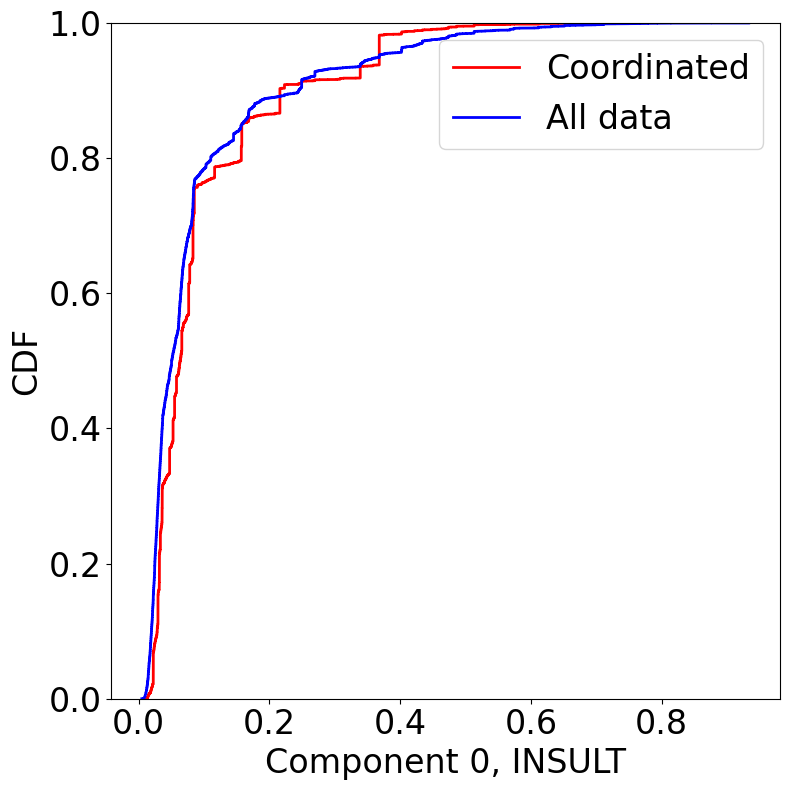

Mann-Whitney U Statistic: 15445694582.5
P-value: 3.2246882350994374e-95
KS Statistic: 0.1780498895129073
P-value: 3.2246882350994374e-95
Coordinated median THREAT , score : 0.13346854
Non-Coordinated median THREAT , score : 0.1115629


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_THREAT.png
./plots/component_0_THREAT.png


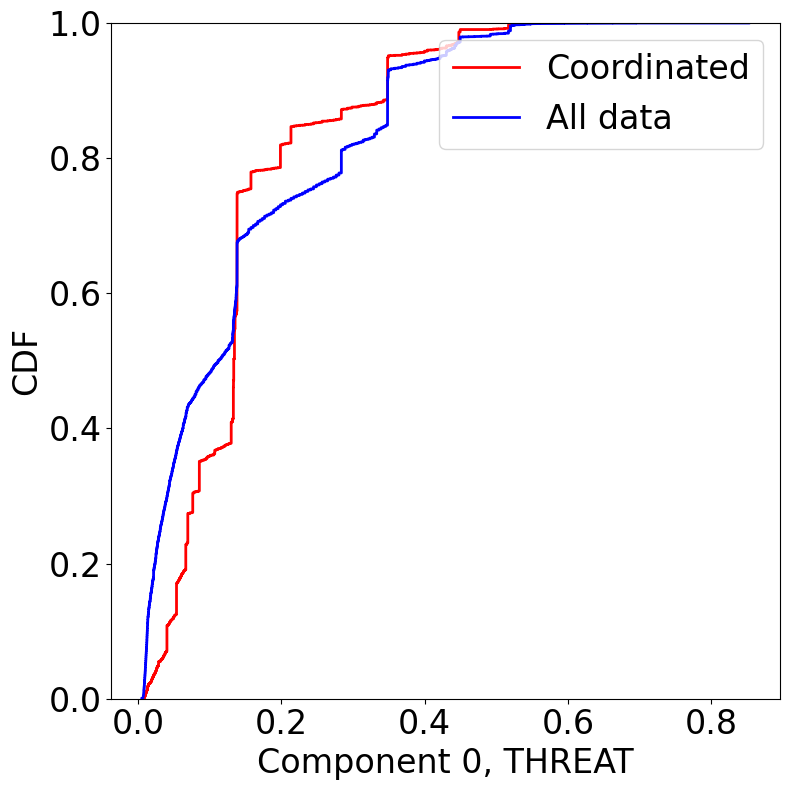

Mann-Whitney U Statistic: 15127892217.5
P-value: 5.474079249365596e-69
KS Statistic: 0.23880209058857013
P-value: 5.474079249365596e-69
Coordinated median TOXICITY , score : 0.24442963
Non-Coordinated median TOXICITY , score : 0.2359567


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_TOXICITY.png
./plots/component_0_TOXICITY.png


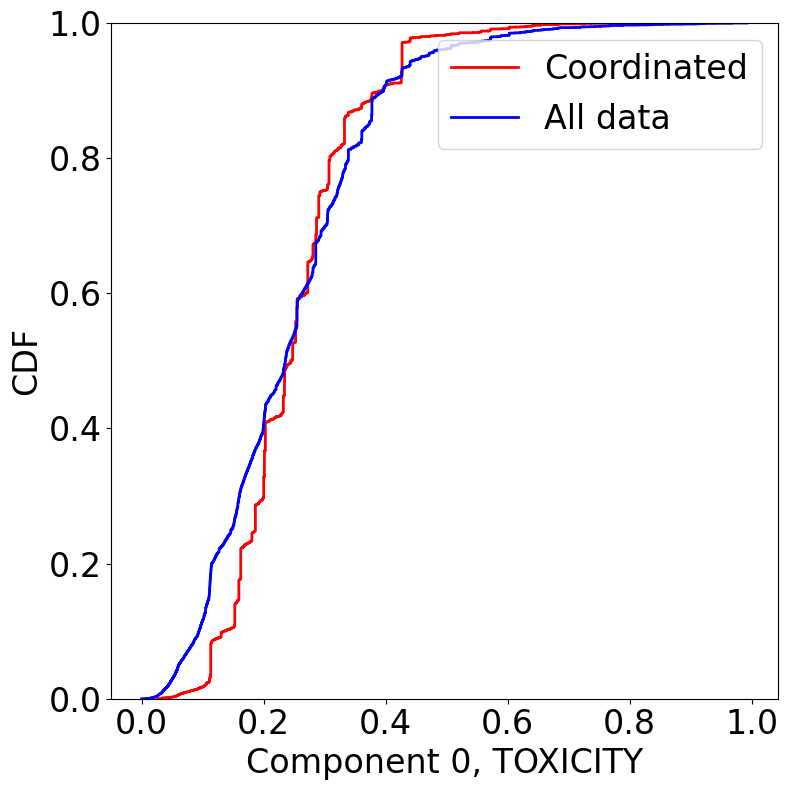

Mann-Whitney U Statistic: 14229691807.5
P-value: 4.66987279498269e-18
KS Statistic: 0.15688875538220987
P-value: 4.66987279498269e-18
Coordinated median SEVERE_TOXICITY , score : 0.018384963
Non-Coordinated median SEVERE_TOXICITY , score : 0.0127685545


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_SEVERE_TOXICITY.png
./plots/component_0_SEVERE_TOXICITY.png


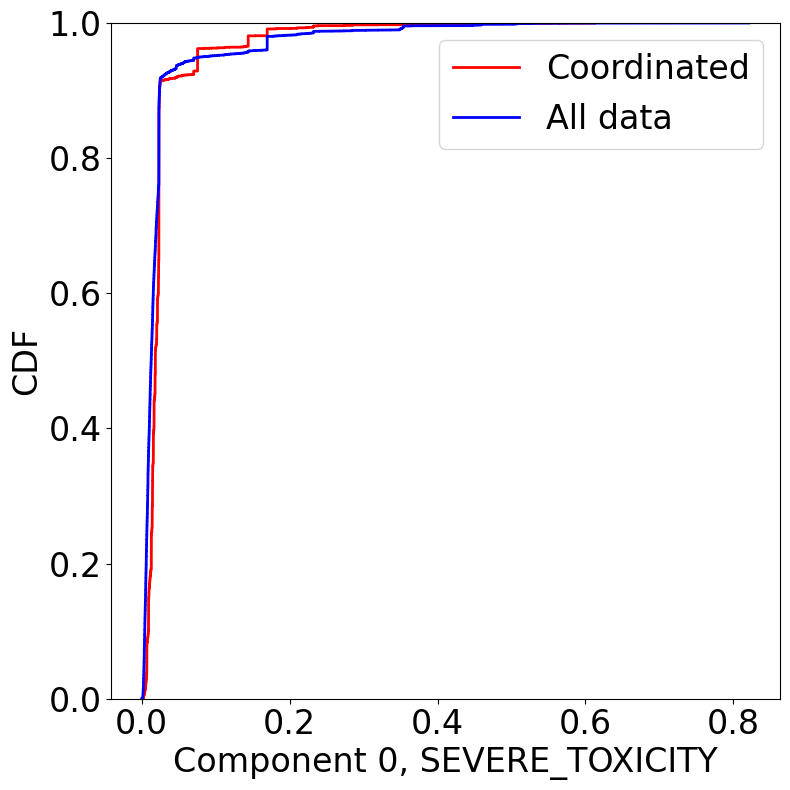

Mann-Whitney U Statistic: 17330401115.5
P-value: 0.0
KS Statistic: 0.3108197027497184
P-value: 0.0
Coordinated median PROFANITY , score : 0.07805514
Non-Coordinated median PROFANITY , score : 0.05393682


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_PROFANITY.png
./plots/component_0_PROFANITY.png


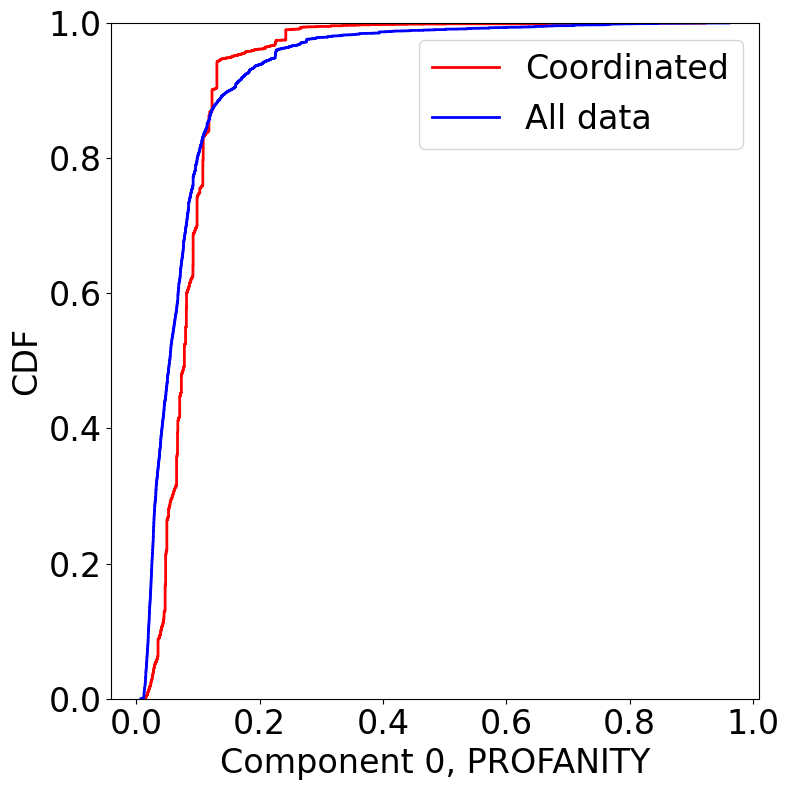

Mann-Whitney U Statistic: 17145425062.5
P-value: 3.694807139077135e-309
KS Statistic: 0.3112580844491709
P-value: 3.694807139077135e-309
Coordinated median IDENTITY_ATTACK , score : 0.2308735
Non-Coordinated median IDENTITY_ATTACK , score : 0.21668483


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_0_IDENTITY_ATTACK.png
./plots/component_0_IDENTITY_ATTACK.png


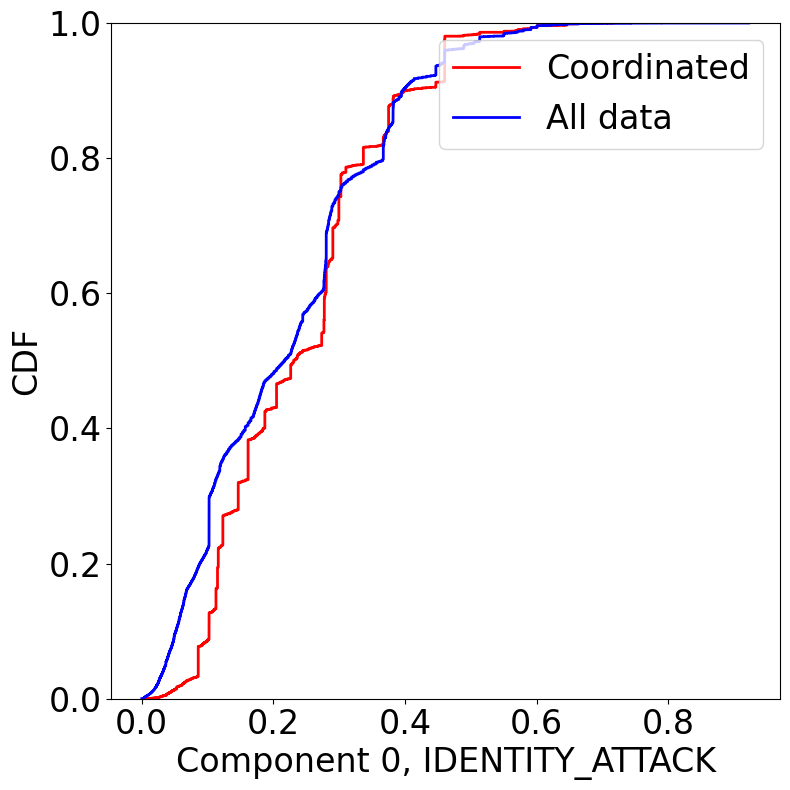

Mann-Whitney U Statistic: 14934702182.0
P-value: 4.02905843801904e-55
KS Statistic: 0.1898094870940083
P-value: 4.02905843801904e-55
Coordinated median INSULT , score : 0.043250903
Non-Coordinated median INSULT , score : 0.05027775


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_INSULT.png
./plots/component_1_INSULT.png


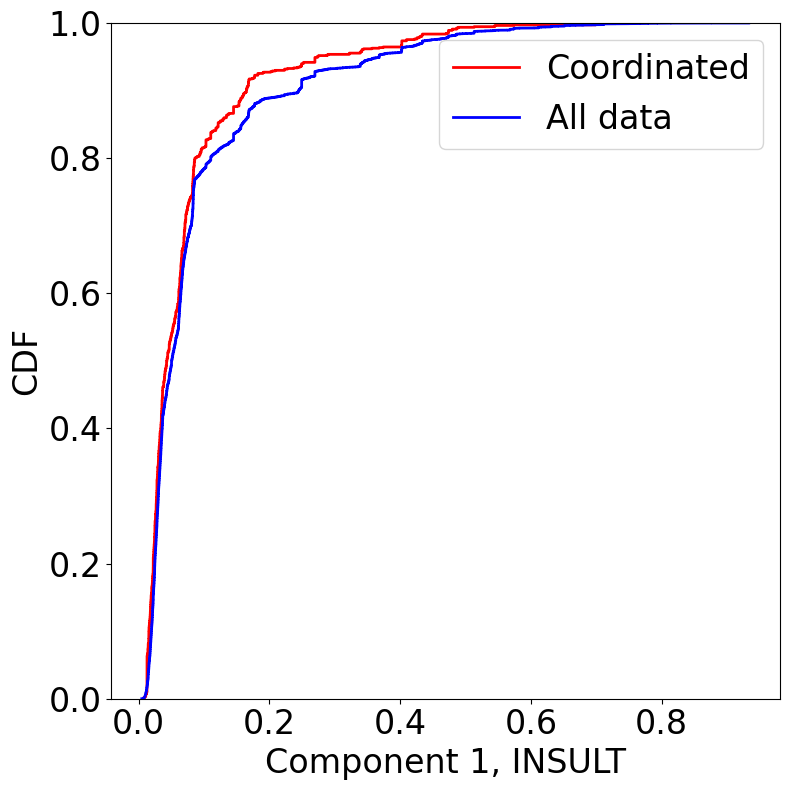

Mann-Whitney U Statistic: 2295791250.0
P-value: 0.9999971352494618
KS Statistic: 0.06010065624324201
P-value: 0.9999971352494618
Coordinated median THREAT , score : 0.13161413
Non-Coordinated median THREAT , score : 0.1115629


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_THREAT.png
./plots/component_1_THREAT.png


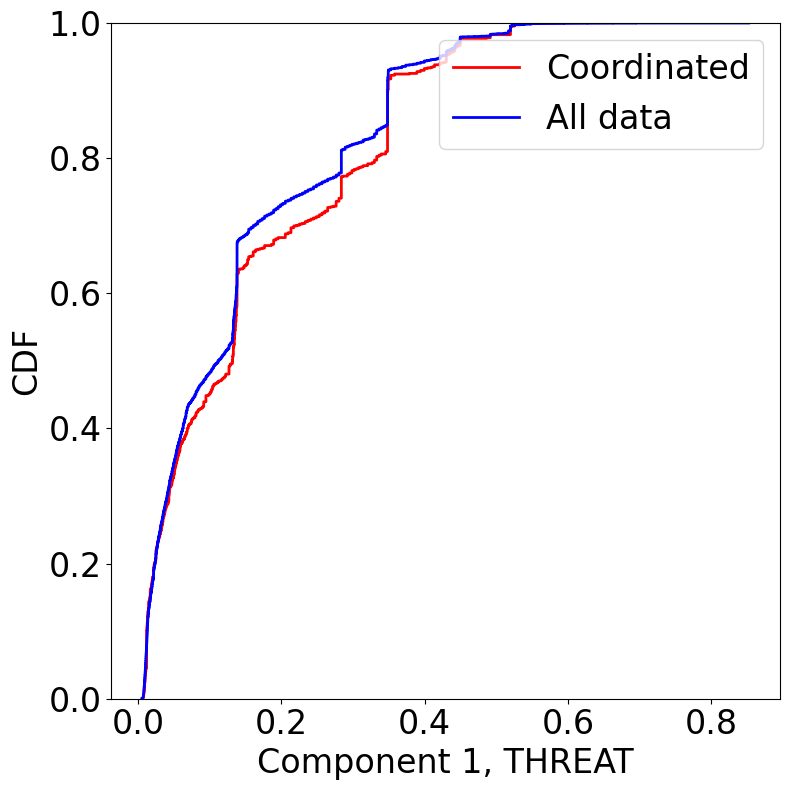

Mann-Whitney U Statistic: 2596718794.5
P-value: 0.008299721115896825
KS Statistic: 0.050579317668143386
P-value: 0.008299721115896825
Coordinated median TOXICITY , score : 0.2359567
Non-Coordinated median TOXICITY , score : 0.2359567


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_TOXICITY.png
./plots/component_1_TOXICITY.png


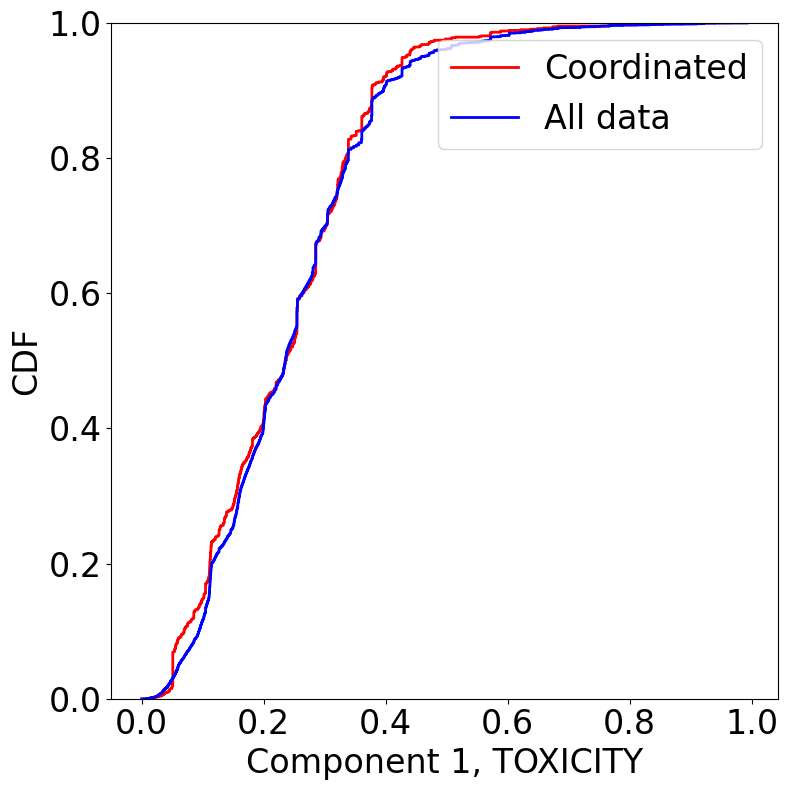

Mann-Whitney U Statistic: 2427655667.5
P-value: 0.9330706412123759
KS Statistic: 0.04266015003050094
P-value: 0.9330706412123759
Coordinated median SEVERE_TOXICITY , score : 0.011367798
Non-Coordinated median SEVERE_TOXICITY , score : 0.0127685545


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_SEVERE_TOXICITY.png
./plots/component_1_SEVERE_TOXICITY.png


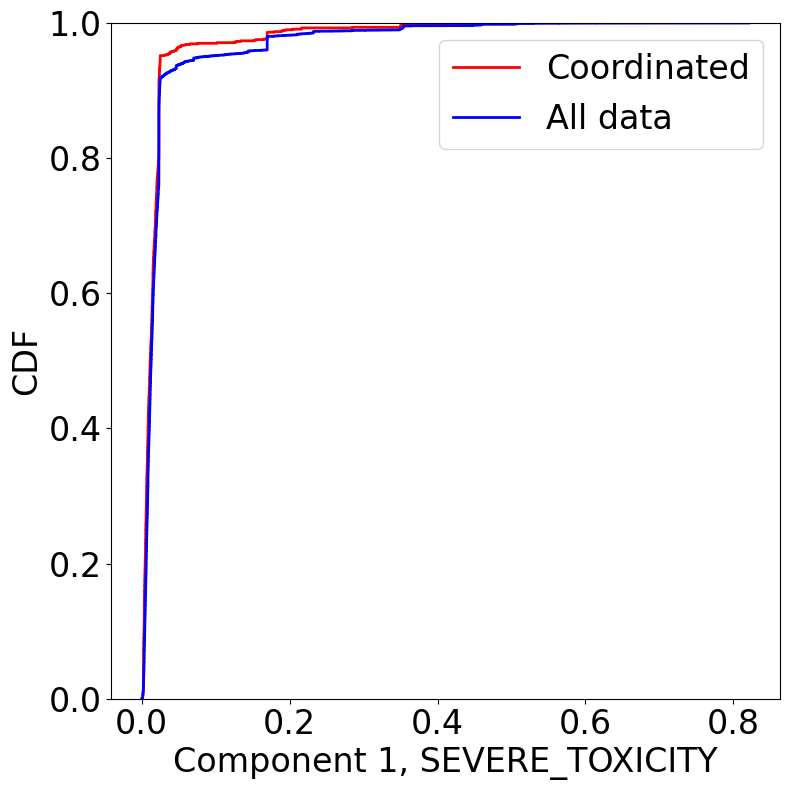

Mann-Whitney U Statistic: 2255323122.0
P-value: 0.9999999777070046
KS Statistic: 0.08293372790413917
P-value: 0.9999999777070046
Coordinated median PROFANITY , score : 0.048425674
Non-Coordinated median PROFANITY , score : 0.05393682


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_PROFANITY.png
./plots/component_1_PROFANITY.png


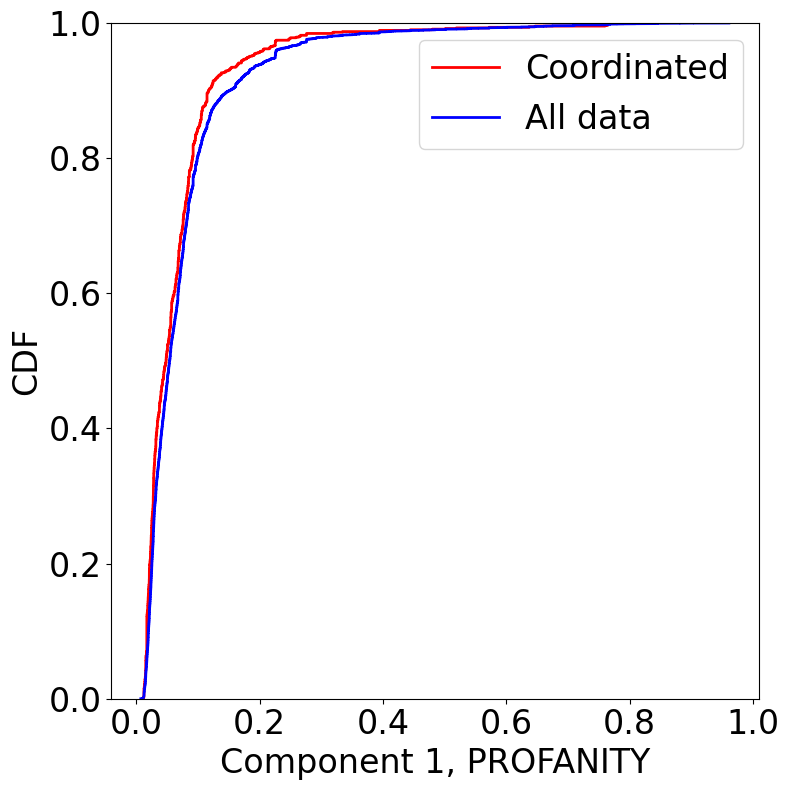

Mann-Whitney U Statistic: 2262465796.5
P-value: 0.9999999432563691
KS Statistic: 0.07733144886958027
P-value: 0.9999999432563691
Coordinated median IDENTITY_ATTACK , score : 0.20088354
Non-Coordinated median IDENTITY_ATTACK , score : 0.21668483


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_1_IDENTITY_ATTACK.png
./plots/component_1_IDENTITY_ATTACK.png


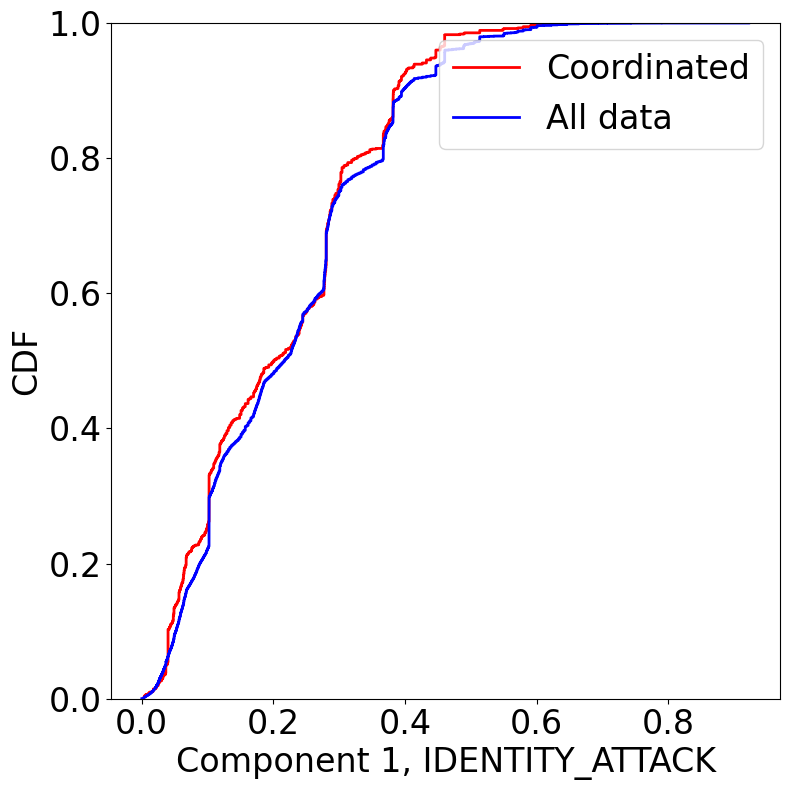

Mann-Whitney U Statistic: 2401827077.5
P-value: 0.9818859892521031
KS Statistic: 0.05084112553089645
P-value: 0.9818859892521031
Coordinated median INSULT , score : 0.06582214
Non-Coordinated median INSULT , score : 0.05027775


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_INSULT.png
./plots/component_2_INSULT.png


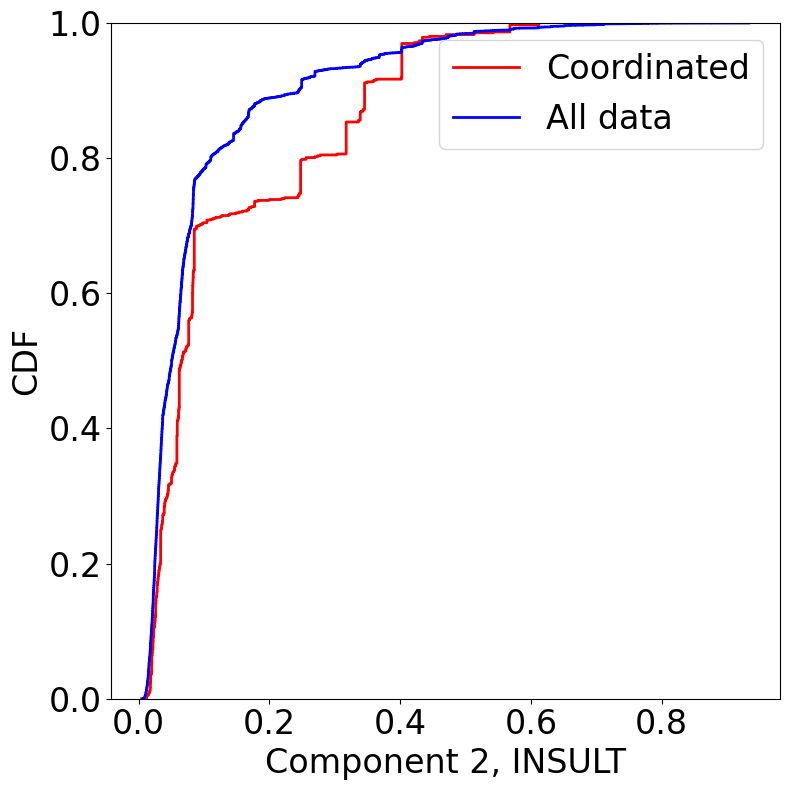

Mann-Whitney U Statistic: 2079872255.0
P-value: 7.584948172254152e-24
KS Statistic: 0.1885749448018047
P-value: 7.584948172254152e-24
Coordinated median THREAT , score : 0.16067244
Non-Coordinated median THREAT , score : 0.1115629


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_THREAT.png
./plots/component_2_THREAT.png


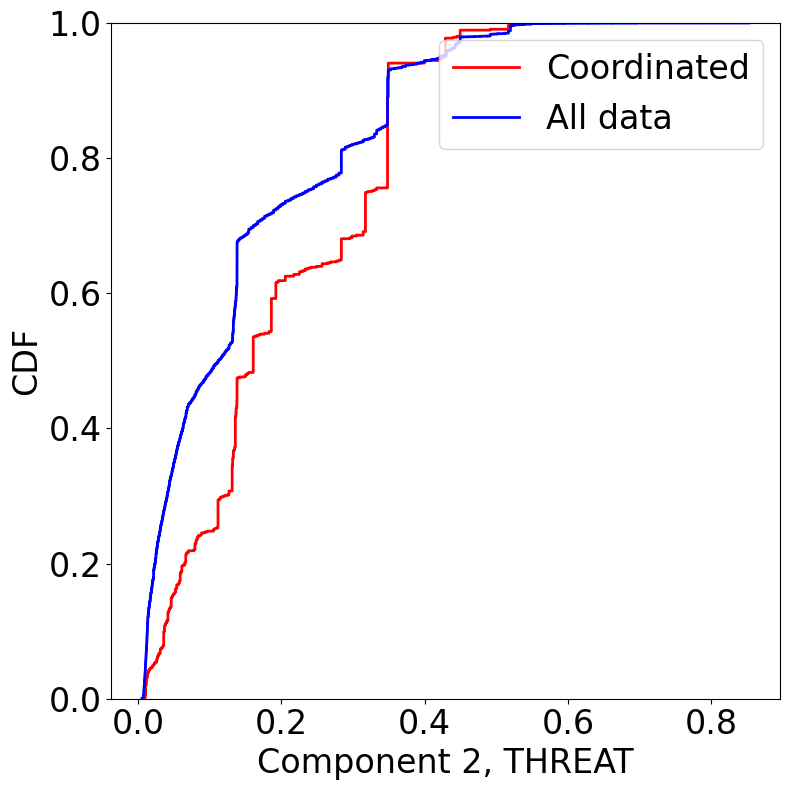

Mann-Whitney U Statistic: 2179181140.0
P-value: 1.406223616680054e-37
KS Statistic: 0.2439720265516641
P-value: 1.406223616680054e-37
Coordinated median TOXICITY , score : 0.27975297
Non-Coordinated median TOXICITY , score : 0.2359567


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_TOXICITY.png
./plots/component_2_TOXICITY.png


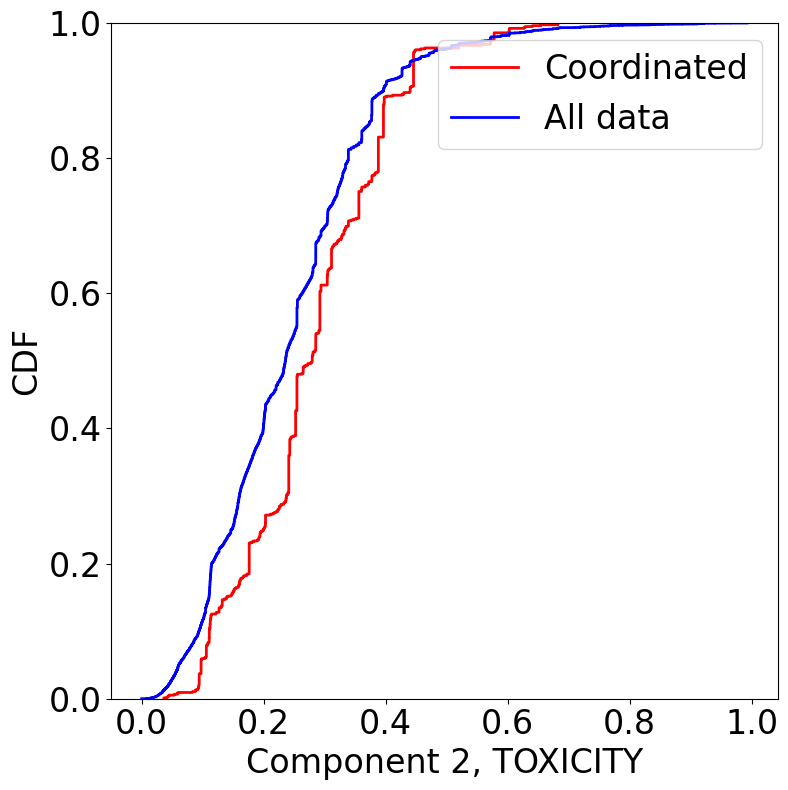

Mann-Whitney U Statistic: 2053775293.0
P-value: 8.727780237108404e-21
KS Statistic: 0.2146651529963507
P-value: 8.727780237108404e-21
Coordinated median SEVERE_TOXICITY , score : 0.023076924
Non-Coordinated median SEVERE_TOXICITY , score : 0.0127685545


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_SEVERE_TOXICITY.png
./plots/component_2_SEVERE_TOXICITY.png


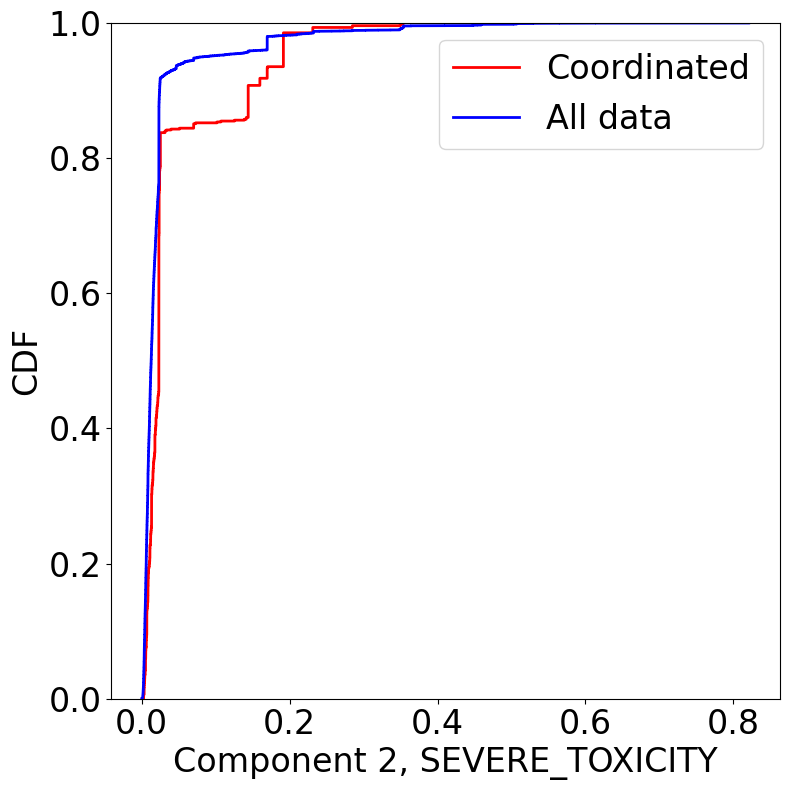

Mann-Whitney U Statistic: 2324805301.5
P-value: 1.1397139702307466e-63
KS Statistic: 0.3078236886482684
P-value: 1.1397139702307466e-63
Coordinated median PROFANITY , score : 0.082581155
Non-Coordinated median PROFANITY , score : 0.05393682


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_PROFANITY.png
./plots/component_2_PROFANITY.png


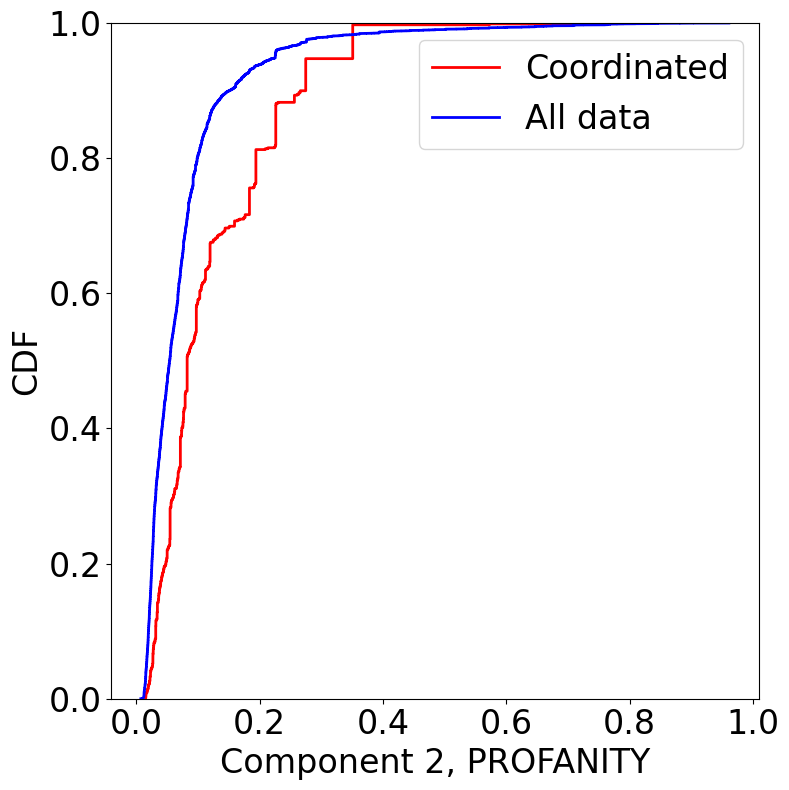

Mann-Whitney U Statistic: 2354301935.5
P-value: 1.0053988454245587e-69
KS Statistic: 0.2828269917750197
P-value: 1.0053988454245587e-69
Coordinated median IDENTITY_ATTACK , score : 0.28034934
Non-Coordinated median IDENTITY_ATTACK , score : 0.21668483


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_2_IDENTITY_ATTACK.png
./plots/component_2_IDENTITY_ATTACK.png


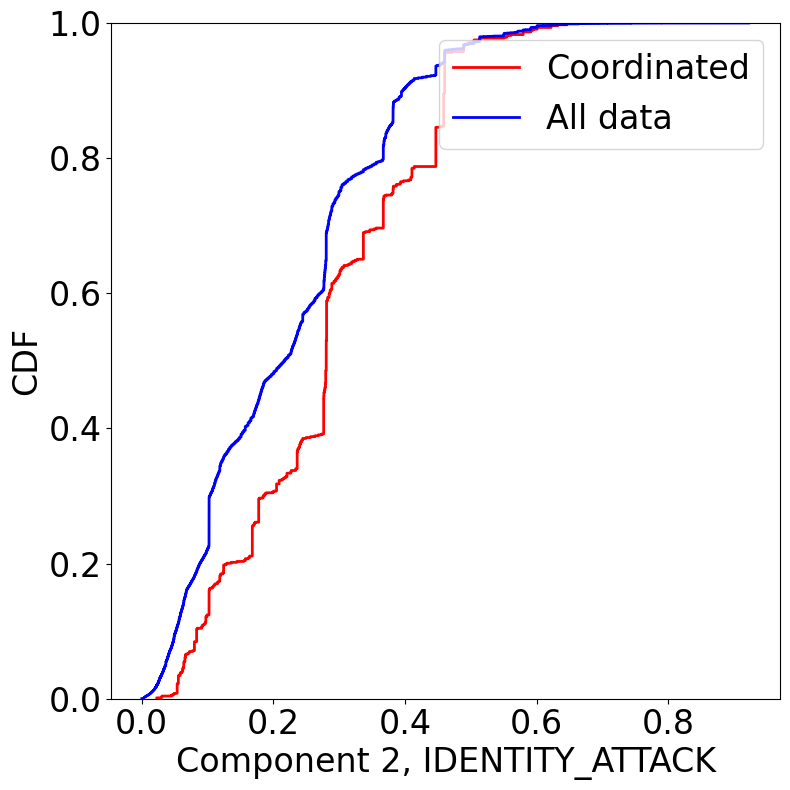

Mann-Whitney U Statistic: 2136737718.0
P-value: 2.60167597665651e-31
KS Statistic: 0.21295693039882674
P-value: 2.60167597665651e-31
Coordinated median INSULT , score : 0.0282267515
Non-Coordinated median INSULT , score : 0.05027775


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_INSULT.png
./plots/component_3_INSULT.png


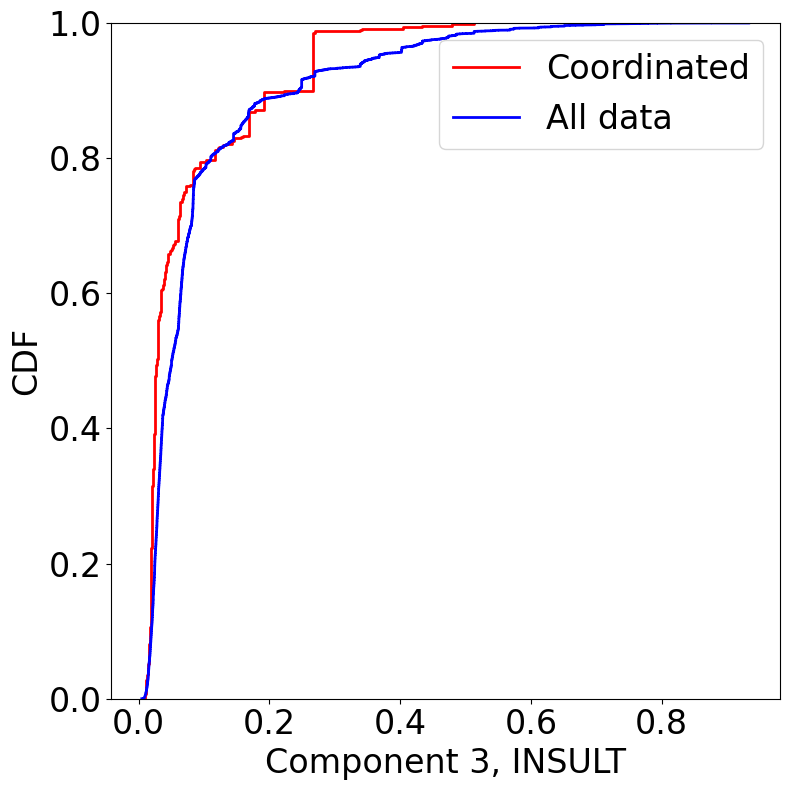

Mann-Whitney U Statistic: 837025436.0
P-value: 1.0
KS Statistic: 0.2621974541809668
P-value: 1.0
Coordinated median THREAT , score : 0.04201601
Non-Coordinated median THREAT , score : 0.1115629


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_THREAT.png
./plots/component_3_THREAT.png


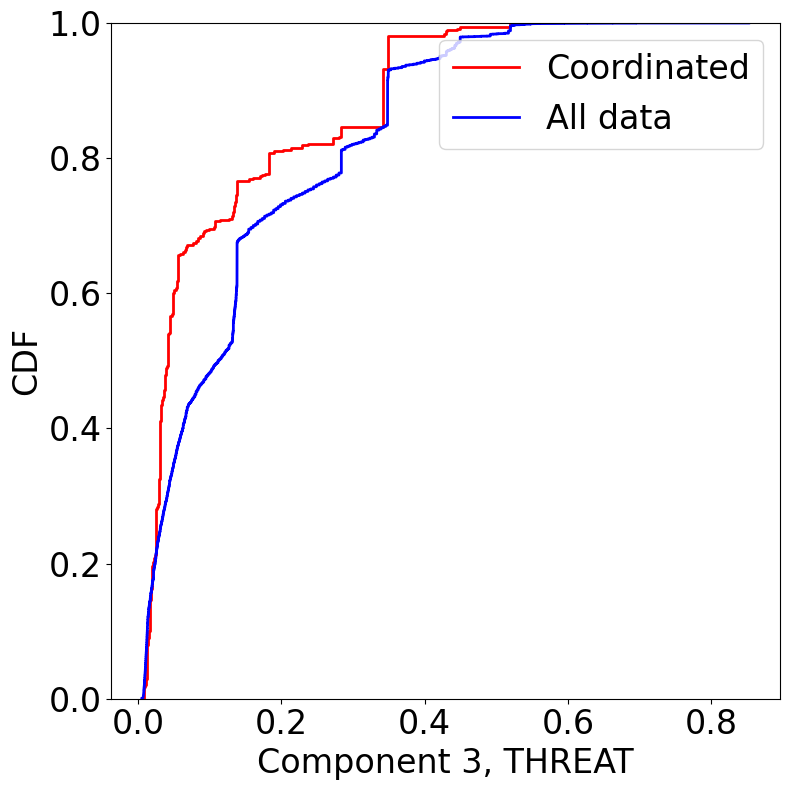

Mann-Whitney U Statistic: 874136363.5
P-value: 0.9999999999999631
KS Statistic: 0.28256980264435577
P-value: 0.9999999999999631
Coordinated median TOXICITY , score : 0.12051485
Non-Coordinated median TOXICITY , score : 0.2359567


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_TOXICITY.png
./plots/component_3_TOXICITY.png


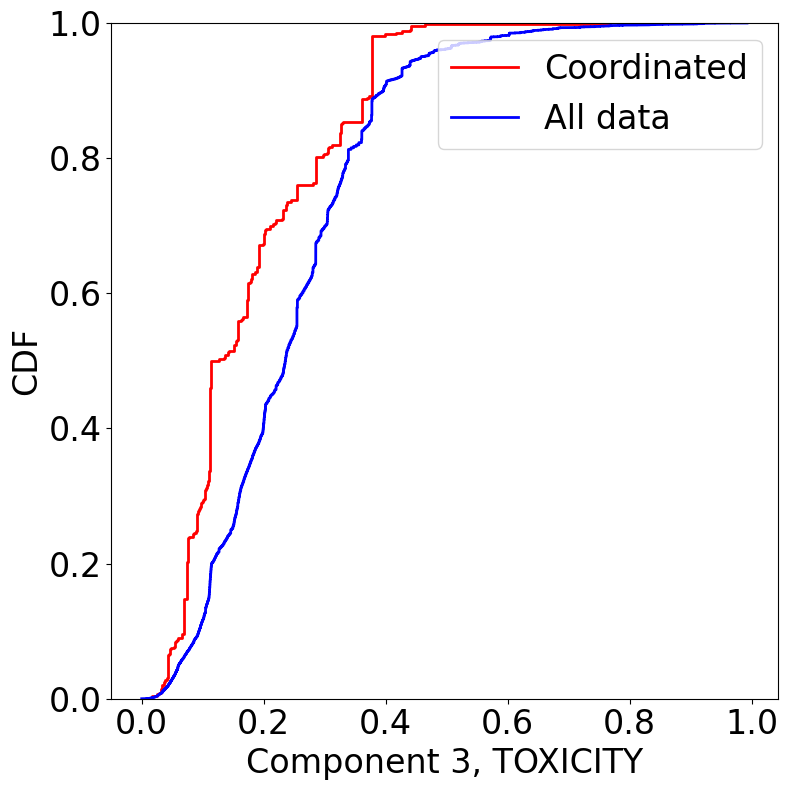

Mann-Whitney U Statistic: 748720613.5
P-value: 1.0
KS Statistic: 0.30448877838469846
P-value: 1.0
Coordinated median SEVERE_TOXICITY , score : 0.0077056885
Non-Coordinated median SEVERE_TOXICITY , score : 0.0127685545


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_SEVERE_TOXICITY.png
./plots/component_3_SEVERE_TOXICITY.png


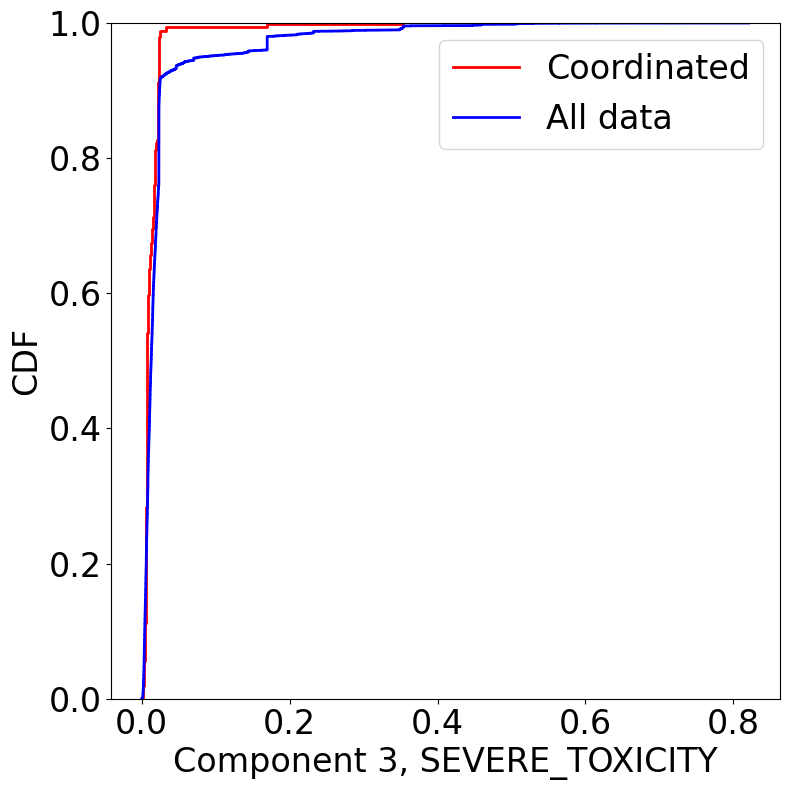

Mann-Whitney U Statistic: 842806440.0
P-value: 1.0
KS Statistic: 0.2550658337115718
P-value: 1.0
Coordinated median PROFANITY , score : 0.04141149
Non-Coordinated median PROFANITY , score : 0.05393682


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_PROFANITY.png
./plots/component_3_PROFANITY.png


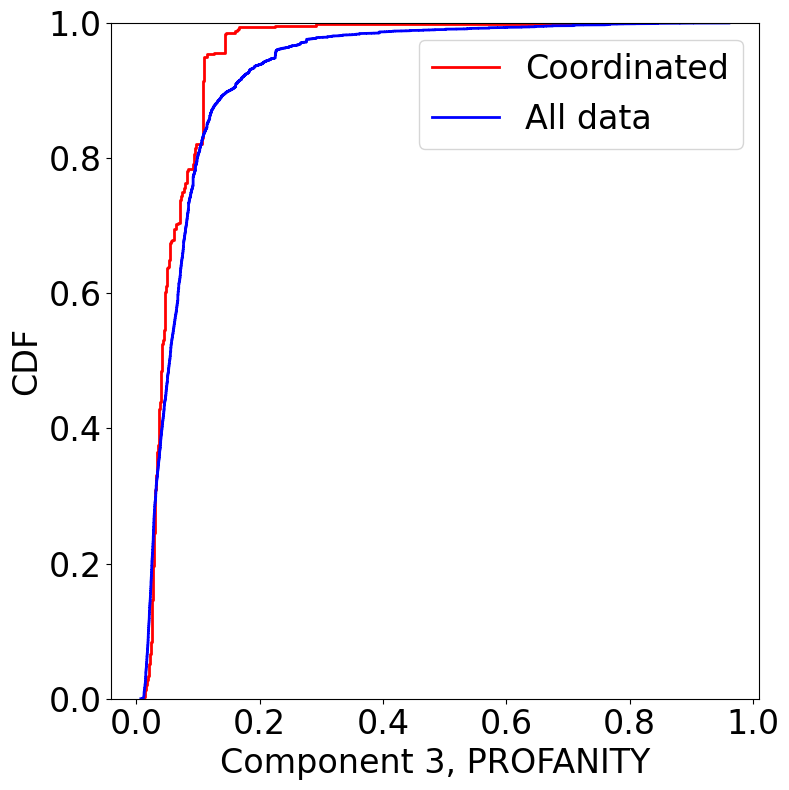

Mann-Whitney U Statistic: 1004061197.5
P-value: 0.9984162318121657
KS Statistic: 0.16534333560239722
P-value: 0.9984162318121657
Coordinated median IDENTITY_ATTACK , score : 0.11512129
Non-Coordinated median IDENTITY_ATTACK , score : 0.21668483


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_3_IDENTITY_ATTACK.png
./plots/component_3_IDENTITY_ATTACK.png


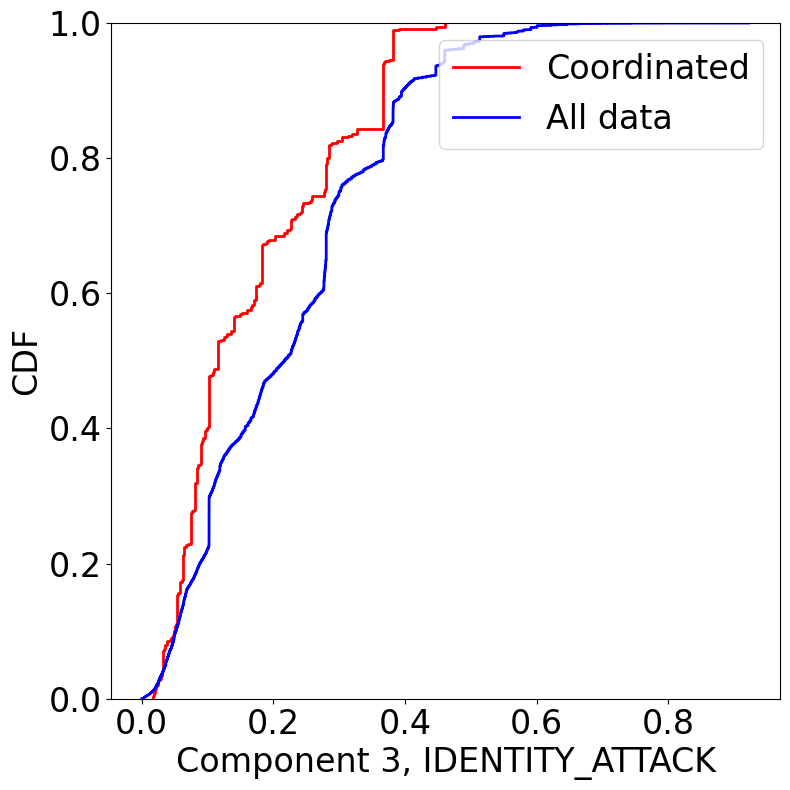

Mann-Whitney U Statistic: 843337831.0
P-value: 1.0
KS Statistic: 0.21033543401760152
P-value: 1.0
Coordinated median INSULT , score : 0.033735814
Non-Coordinated median INSULT , score : 0.05027775


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_INSULT.png
./plots/component_4_INSULT.png


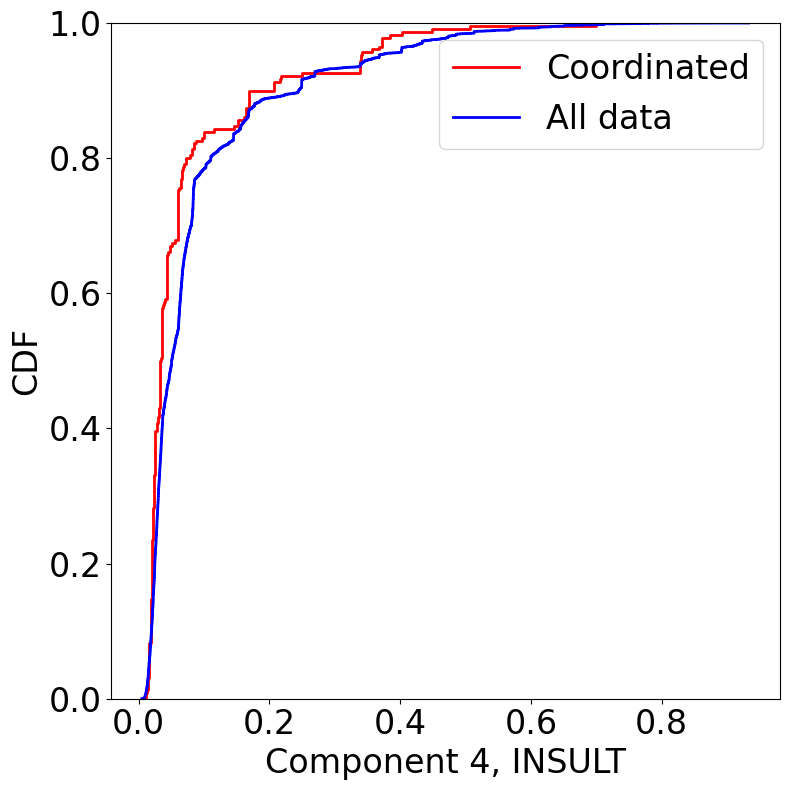

Mann-Whitney U Statistic: 421117277.5
P-value: 0.9999997943142581
KS Statistic: 0.20062740425309722
P-value: 0.9999997943142581
Coordinated median THREAT , score : 0.051391184
Non-Coordinated median THREAT , score : 0.1115629


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_THREAT.png
./plots/component_4_THREAT.png


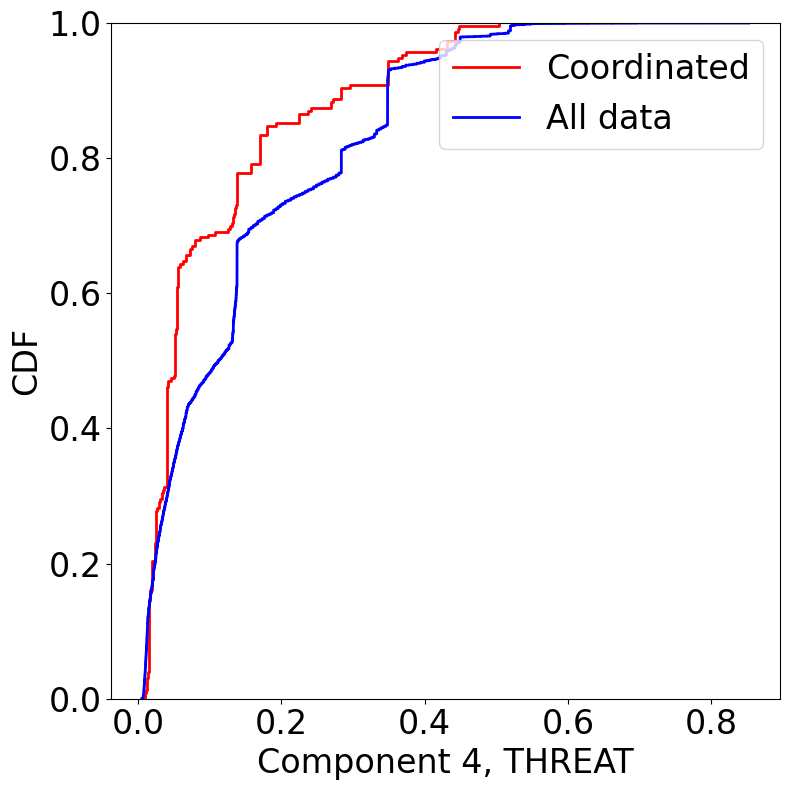

Mann-Whitney U Statistic: 434617856.0
P-value: 0.9999942006362136
KS Statistic: 0.26304545599225626
P-value: 0.9999942006362136
Coordinated median TOXICITY , score : 0.15987846
Non-Coordinated median TOXICITY , score : 0.2359567


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_TOXICITY.png
./plots/component_4_TOXICITY.png


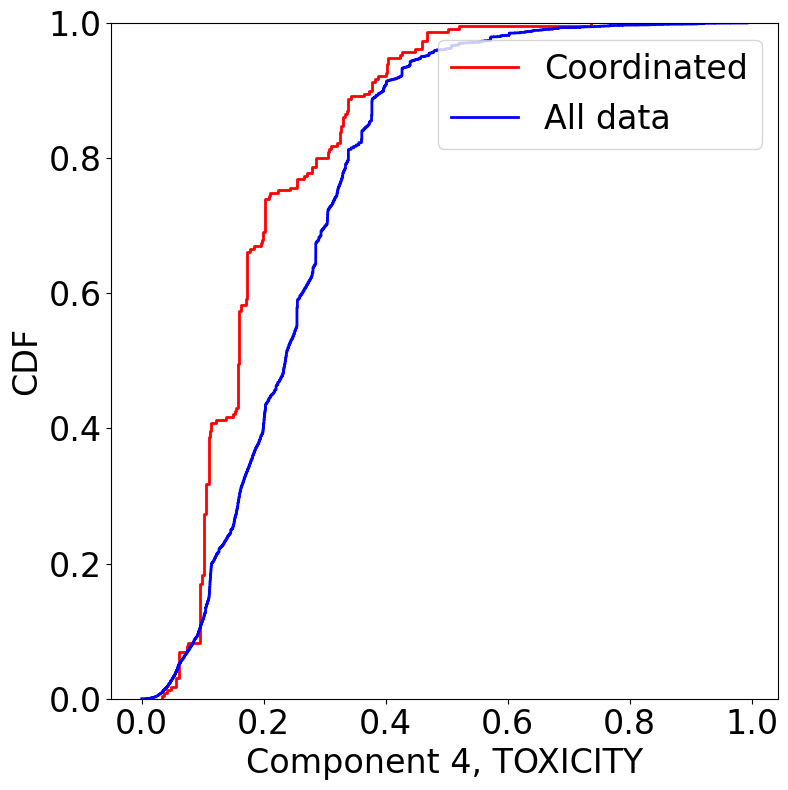

Mann-Whitney U Statistic: 375164266.0
P-value: 0.9999999999999194
KS Statistic: 0.32349189020390584
P-value: 0.9999999999999194
Coordinated median SEVERE_TOXICITY , score : 0.0064086914
Non-Coordinated median SEVERE_TOXICITY , score : 0.0127685545


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_SEVERE_TOXICITY.png
./plots/component_4_SEVERE_TOXICITY.png


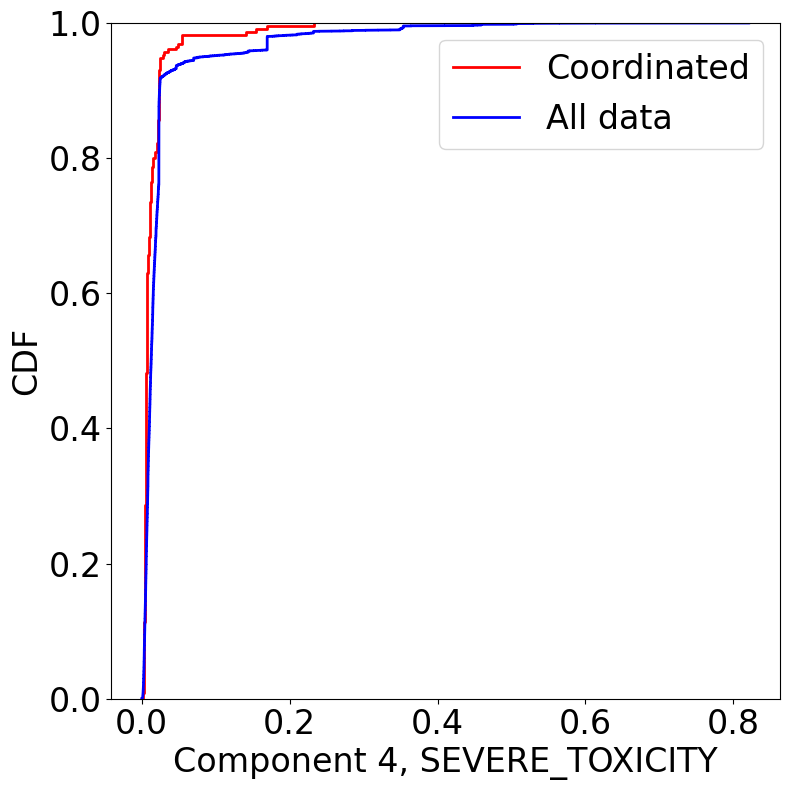

Mann-Whitney U Statistic: 358878930.0
P-value: 0.9999999999999999
KS Statistic: 0.36188813186445196
P-value: 0.9999999999999999
Coordinated median PROFANITY , score : 0.0304370245
Non-Coordinated median PROFANITY , score : 0.05393682


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_PROFANITY.png
./plots/component_4_PROFANITY.png


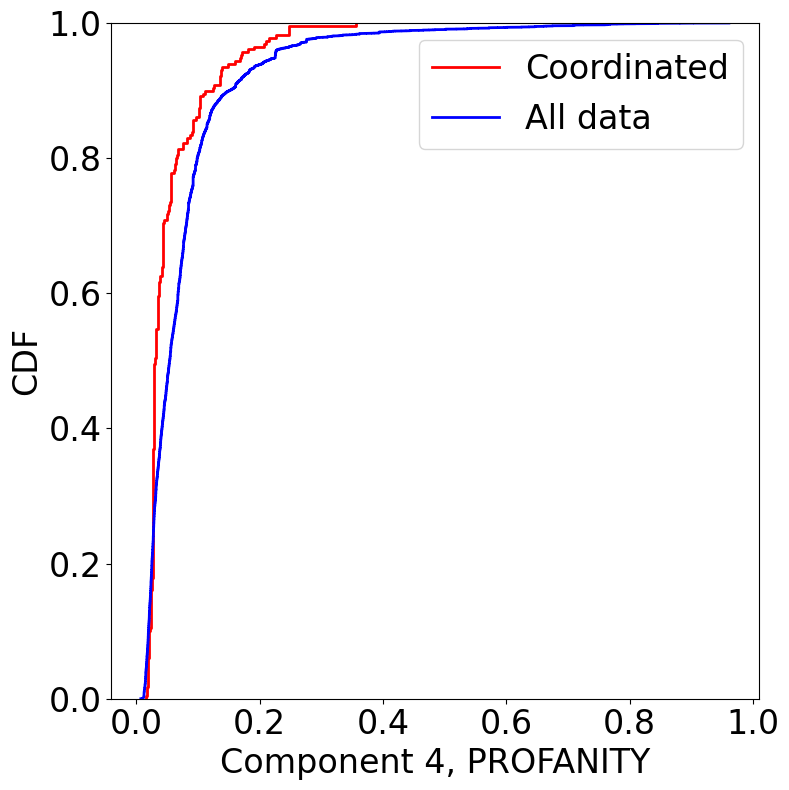

Mann-Whitney U Statistic: 408648317.0
P-value: 0.9999999937015608
KS Statistic: 0.293796150400247
P-value: 0.9999999937015608
Coordinated median IDENTITY_ATTACK , score : 0.10221587
Non-Coordinated median IDENTITY_ATTACK , score : 0.21668483


/tmp/ipykernel_1524679/1084581306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', total_columns)


./plots/component_4_IDENTITY_ATTACK.png
./plots/component_4_IDENTITY_ATTACK.png


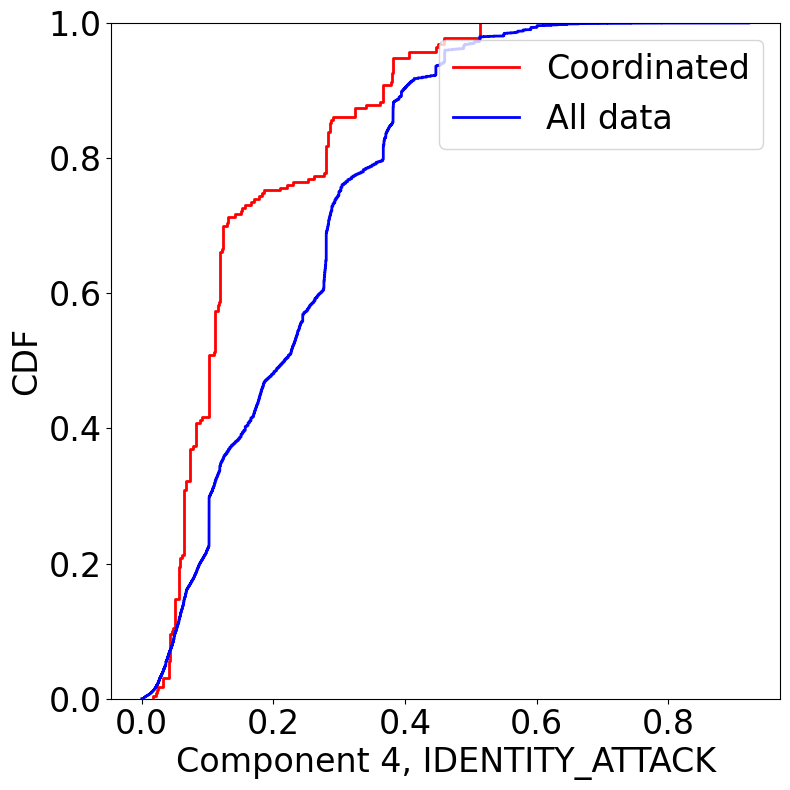

Mann-Whitney U Statistic: 367786069.0
P-value: 0.9999999999999954
KS Statistic: 0.3447133275240009
P-value: 0.9999999999999954


In [8]:
all_result = []
for i in range(5):
    # if i  > 3:
    #     break
        
    df_coord = pd.read_pickle(f'{save_path}/component_{i}_coordinated.pkl.gz')
    # df_non_coord = pd.read_pickle(f'{save_path}/component_{i}_non_coordinated.pkl.gz')

    df_coord = df_coord.loc[~df_coord['INSULT'].isnull()]
    
    for x in perspective:
        parameters['columns'][0]['column']=x
        parameters['columns'][1]['column']=x
        parameters['xlabel'] =  f'Component {i}, {x}'
        parameters['ylabel'] = 'CDF'
        parameters['save']['filename'] = f'component_{i}_{x}.png'
        parameters['data'] = [df_coord, df_non_coord]
        parameters['log_yscale'] = False
        parameters['log_xscale'] = False

        median_coord = df_coord[x].median()
        
        median_non_coord = df_non_coord[x].median()
        print(f'Coordinated median {x} , score :', median_coord)
        print(f'Non-Coordinated median {x} , score :', median_non_coord)

        
        ccdf(parameters)
    
        
        stat, p_value = stats.mannwhitneyu(df_coord[x],
                                           df_non_coord[x],
                                           alternative='greater',
                                          )
    
        # Output the results
        print(f"Mann-Whitney U Statistic: {stat}")
        print(f"P-value: {p_value}")
    
        ks_statistic, k_p_value = stats.ks_2samp(df_coord[x],
                                                 df_non_coord[x],
                                                 
                                              )
        
        # Output the results
        print(f"KS Statistic: {ks_statistic}")
        print(f"P-value: {p_value}")

        all_result.append([i, x, median_coord, median_non_coord, k_p_value, p_value])
        # df_result_median = pd.DataFrame(data = all_result,
        #                         columns=['component',
        #                                  'score',
        #                                  'median_coor_user_score',
        #                                  'median_non_coor_user_score',
        #                                  'KS test p-value'
        #                                 ]
        #                        )
        # break

    # break


In [9]:
df_result_median = pd.DataFrame(data = all_result,
                                columns=['component',
                                         'score',
                                         'median_coor_score',
                                         'median_non_coor_score',
                                         'KS test p-value',
                                         'Man Whitney p-value'
                                        ]
                               )

In [10]:
df_result_median.to_pickle(
    './../data/results/overall_score_comparison.pkl.gz'
)

#### **Median scores comparison per user**

In [ ]:
all_result = []
for i in range(5):
    # if i  > 3:
    #     break
        
    df_coord = pd.read_pickle(f'{save_path}/component_{i}_coordinated.pkl.gz')
    # df_non_coord = pd.read_pickle(f'{save_path}/component_{i}_non_coordinated.pkl.gz')

    df_coord = df_coord.loc[~df_coord['INSULT'].isnull()]
    # df_non_coord = df_non_coord.loc[~df_non_coord['INSULT'].isnull()]

    for x in perspective:
       
        parameters['xlabel'] =  f'Component {i}, \n median {x} per user'
        parameters['ylabel'] = 'CDF'
        parameters['save']['filename'] = f'component_{i}_{x}_median_per_user.png'
        
        parameters['log_yscale'] = False
        parameters['log_xscale'] = False
        
        df_coord_user = df_coord.groupby('user_id')[x].median().to_frame(f'median_{x}').reset_index()
        df_non_coord_user = df_non_coord.groupby('user_id')[x].median().to_frame(f'median_{x}').reset_index()

        parameters['data'] = [df_coord_user, df_non_coord_user]
        
        print(f'Coordinated median {x} , score :', df_coord_user[f'median_{x}'].median())
        print(f'Non-Coordinated median {x} , score :', df_non_coord_user[f'median_{x}'].median())

        parameters['columns'][0]['column']=f'median_{x}'
        parameters['columns'][1]['column']=f'median_{x}'
        
        ccdf(parameters)
    
        
        stat, p_value = stats.mannwhitneyu(df_coord_user[f'median_{x}'],
                                           df_non_coord_user[f'median_{x}'],
                                           alternative='greater',
                                          )
    
        # Output the results
        print(f"Mann-Whitney U Statistic: {stat}")
        print(f"P-value: {p_value}")
    
        ks_statistic, k_p_value = stats.ks_2samp(df_coord_user[f'median_{x}'],
                                               df_non_coord_user[f'median_{x}']
                                              )
        
        # Output the results
        print(f"KS Statistic: {ks_statistic}")
        print(f"P-value: {p_value}")

        all_result.append([i, x, df_coord_user[f'median_{x}'].median(),
                           df_non_coord_user[f'median_{x}'].median(),
                           k_p_value,
                           p_value
                          ])
        # break

    # break


In [ ]:
df_result_median_user = pd.DataFrame(data = all_result,
                                     columns=['component',
                                         'score',
                                         'median_coor_user_score',
                                         'median_non_coor_user_score',
                                         'KS test p-value',
                                         'Man Whitney p-value'
                                        ]
                               )

In [ ]:
df_result_median_user.to_pickle(
    './../data/results/overall_score_comparison_user_level.pkl.gz'
)

In [ ]:
# df_result = pd.DataFrame(data=all_result,
#                          columns=['component',
#                                   'type_of_score',
#                                   'median_coord_score',
#                                   'median_uncoord_score',
#                                   'KS_test_pvalue'
#                                  ]
#                         )